#Análise exploratória de dados
Conjunto de dados: `Secondary Mushroom`  (Cogumelo Secundário) <br>

-Autoras: <br>
Ana Luíza Gomes Vieira (analuizagv2000@gmail.com) <br>
Sarah Vitória Moreira de Aquino (sarahvitoriaaquino@gmail.com)<br>

-Data: <br>
Abril de 2025

-Modificado a partir de: <br>
MD. SAMIN MORSHED et al. Predicting Mushroom Edibility with Effective Classification and Efficient Feature Selection Techniques. 7 jan. 2023.

---

001 Avaliação exploratória da base de dados

Importação das bibliotecas

In [1]:
import pandas as pd # Para ler e manipular datasets
from IPython.display import Markdown # Formatação/estilização de texto
import numpy as np # Para operações matemáticas
from matplotlib import pyplot as plt #Plotar e vizualizar gráficos simples
import seaborn as sns # Gráficos mais estilizados
import tkinter as tk # Importar o módulo de interface gráfica
from tkinter import filedialog # Importar o módulo de interface gráfica
import os # Importar o módulo de aprendizado de máquina
from sklearn.ensemble import ExtraTreesClassifier # Importar o modelo de árvores extremamente aleatórias (utilizado exclusivamente para avaliação da importante)

Importando e carregando a base de dados

In [2]:
# Caminho manual, sem seletor
caminho_arquivo = r"C:\Users\analu\Downloads\secondary_data.csv\secondary_data.csv"
secondary_df = pd.read_csv(caminho_arquivo, sep=';')

Informações iniciais

In [3]:
# @title informações iniciais
display(Markdown("### Primeiras linhas"))
display(secondary_df.head())

display(Markdown("### Ultimas linhas"))
display(secondary_df.tail())

display(Markdown("### Informação das variáveis"))
secondary_df.info()

display(Markdown("### Quantidade de valores únicos"))
secondary_df.nunique()

### Primeiras linhas

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


### Ultimas linhas

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61068,p,1.17,s,s,y,f,f,f,f,3.25,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

### Quantidade de valores únicos

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

 ---
 A partir das informações iniciais, podemos dizer que:


*   O conjunto de dados tem  61069 unidades amostrais com 21 colunas.
*   Das 21 variáveis:
   -  3 são quantitativas contínuas:  `cap-diameter`, `stem-height`, ` stem-width`
   - 18 são qualitativas nominais: `class`, `cap-shape`,`cap-surface`, `cap-color`,`does-bruise-or-bleed`, `gill-attachment`,`gill-spacing`, `gill-color`,`stem-root`,`stem-surface`,`stem-color`,`veil-type`, `veil-color`, `has-ring`, `ring-type`, `spore-print-color`, `habitat`, `season`

*  Existem 20 variáveis independentes (features) que servirão como input para os modelos de classificação.
*  A variável alvo `class` possui 2 classes distintas.
---

Dicionário de dados

In [4]:
# @title Dicionário de dados
secondary_dicionario = pd.DataFrame([
    {
        "variavel": "class",
        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Classificação dos cogumelos em comestível ou venenoso.",
        "possíveis valores": "poisonous=p, edibile=e (binary)",
    },
    {
        "variavel": "cap-diameter",
        "tipo": "quantitativa",
        "subtipo": "contínua",
        "descricao": "diâmetro do píleo",
        "possíveis valores": "float number in cm",
    },
    {
        "variavel": "cap-shape",
        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Formato do píleo do cogumelo",
        "possíveis valores": "bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o",
    },
    {
        "variavel": "cap-surface",
        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Superfície do píleo do cogumelo",
        "possíveis valores": "fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e",
    },
    {
        "variavel": "cap-color",
        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Cor do píleo do cogumelo",
        "possíveis valores": "brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k",
    },
    {
        "variavel": "does-bruise-or-bleed",
        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Hematoma ou sangue",
        "possíveis valores": "bruises-or-bleeding=t,no=f",
    },
    {
        "variavel": "gill-attachment",
        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "fixação branquial",
        "possíveis valores": "adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?",
    },

    {
        "variavel": "gill-spacing",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Espaçamento entre lamela",
        "possíveis valores": "close=c, distant=d, none=f",
    },

    {
        "variavel": "gill-color",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Cor de lamela",
        "possíveis valores": "brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k, none=f",
    },

    {
        "variavel": "stem-height",

        "tipo": "quantitativa",
        "subtipo": "contínua",
        "descricao": "altura da caule",
        "possíveis valores": "float number in cm",
    },

    {
        "variavel": "stem-width",

        "tipo": "quantitativa",
        "subtipo": "contínua",
        "descricao": "largura da caule",
        "possíveis valores": "float number in mm",
    },

   {
        "variavel": "stem-root",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Raiz do caule",
        "possíveis valores": "bulbosa = b, inchada = s, em forma de clava = c, em forma de taça = u, igual = e, rizomorfos = z, enraizada = r",
    },

    {
        "variavel": "stem-surface",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Superfície do caule do cogumelo",
        "possíveis valores": "fibrous=i, grooves=g, scaly=y, smooth=s,shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e, none=f",
    },

    {
        "variavel": "stem-color",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Cor do caule do cogumelo",
        "possíveis valores": "brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k, none=f",
    },

    {
        "variavel": "veil-type",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Tipo de véu do cogumelo",
        "possíveis valores": "parcial = p, universal = u",
    },

    {
        "variavel": "veil-color",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Cor do véu do cogumelo",
        "possíveis valores": "brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k",
    },

    {
        "variavel": "has-ring",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Cogumelo possui anel",
        "possíveis valores": "ring=t, none=f",
    },

    {
        "variavel": "ring-type",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Tipo de anel do cogumelo",
        "possíveis valores": "cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?",
    },

    {
        "variavel": "spore-print-color",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Cor do esporo que o cogumelo solta",
        "possíveis valores": "brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f",
    },

    {
        "variavel": "habitat",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Habitat em que o cugumelo vive",
        "possíveis valores": "grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d",
    },

    {
        "variavel": "season",

        "tipo": "qualitativa",
        "subtipo": "nominal",
        "descricao": "Estação",
        "possíveis valores": "spring=s, summer=u, autumn=a, winter=w",
    }
])
secondary_dicionario

,variavel,tipo,subtipo,descricao,possíveis valores
0,class,qualitativa,nominal,Classificação dos cogumelos em comestível ou v...,"poisonous=p, edibile=e (binary)"
1,cap-diameter,quantitativa,contínua,diâmetro do píleo,float number in cm
2,cap-shape,qualitativa,nominal,Formato do píleo do cogumelo,"bell=b, conical=c, convex=x, flat=f, sunken=s,..."
3,cap-surface,qualitativa,nominal,Superfície do píleo do cogumelo,"fibrous=i, grooves=g, scaly=y, smooth=s, shiny..."
4,cap-color,qualitativa,nominal,Cor do píleo do cogumelo,"brown=n, buff=b, gray=g, green=r, pink=p, purp..."
5,does-bruise-or-bleed,qualitativa,nominal,Hematoma ou sangue,"bruises-or-bleeding=t,no=f"
6,gill-attachment,qualitativa,nominal,fixação branquial,"adnate=a, adnexed=x, decurrent=d, free=e, sinu..."
7,gill-spacing,qualitativa,nominal,Espaçamento entre lamela,"close=c, distant=d, none=f"
8,gill-color,qualitativa,nominal,Cor de lamela,"brown=n, buff=b, gray=g, green=r, pink=p, purp..."
9,stem-height,quantitativa,contínua,altura da caule,float number in cm


Construção do gráfico de distribuição por classe

In [5]:
def plot_nested_countplot(data, label, feature, fsize=(8,6), title_="", labels_=None):
    # Agrupar os dados e calcular as porcentagens
    temp = (
        data.groupby(label)[feature]
        .value_counts(normalize=True)
        .rename('percentage')
        .mul(100)
        .reset_index()
    )

    # Criar o gráfico
    plt.figure(figsize=fsize)
    g = sns.barplot(x=feature, y="percentage", hue=label, data=temp)

    # Título
    plt.title(title_, fontsize=14)

    # Legenda personalizada (se fornecida)
    if labels_ is None:
        plt.legend(title=label)
    else:
        plt.legend(labels=labels_, title=label)

    # Adicionar rótulos nas barras (sem mostrar 0%)
    for p in g.patches:
        height = p.get_height()
        if height > 0:
            txt = f'{height:.1f}%'
            txt_x = p.get_x() + p.get_width() / 4
            txt_y = height + 1
            g.text(txt_x, txt_y, txt, fontsize=10)

    plt.ylim(0, max(temp["percentage"]) + 10)
    plt.ylabel("Porcentagem (%)")
    plt.xlabel(feature.capitalize())
    plt.tight_layout()
    plt.show()

Relação entre a estação do ano e a comestibilidade

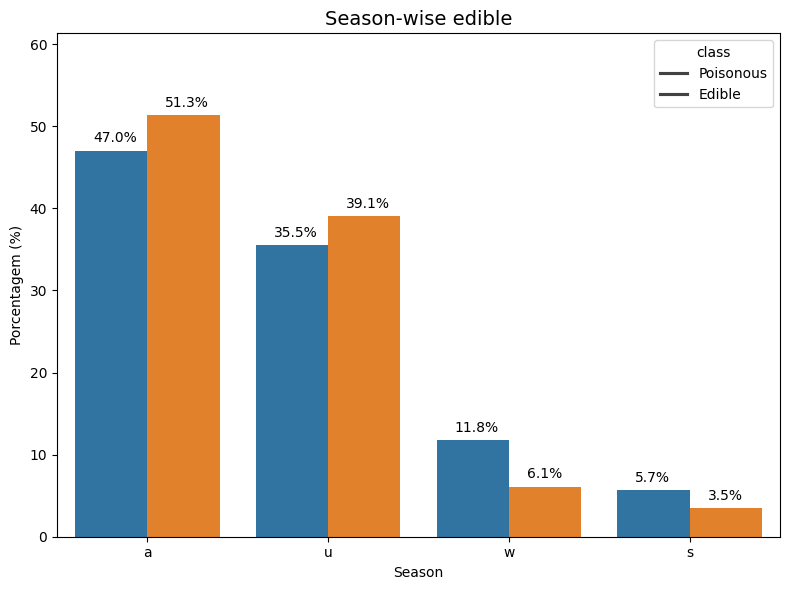

In [6]:
plot_nested_countplot(
    data=secondary_df,
    label='class',
    feature='season',
    fsize=(8,6),
    title_='Season-wise edible',
    labels_=['Poisonous', 'Edible']
)

---
A partir do gráfico, podemos dizer que:

- Outono (`a`) e verão (`u`) concentram a maior parte dos cogumelos, tanto comestíveis quanto venenosos.

- Primavera (`s`) e inverno(`w`) apresentam baixíssima frequência.

- A proporção entre comestíveis e venenosos é relativamente semelhante em cada estação. Isso pode indicar que a estação do ano tem influência na distribuição, mas não necessariamente na classe (venenoso ou comestível).

---

Relação entre o habitat e a comestibilidade

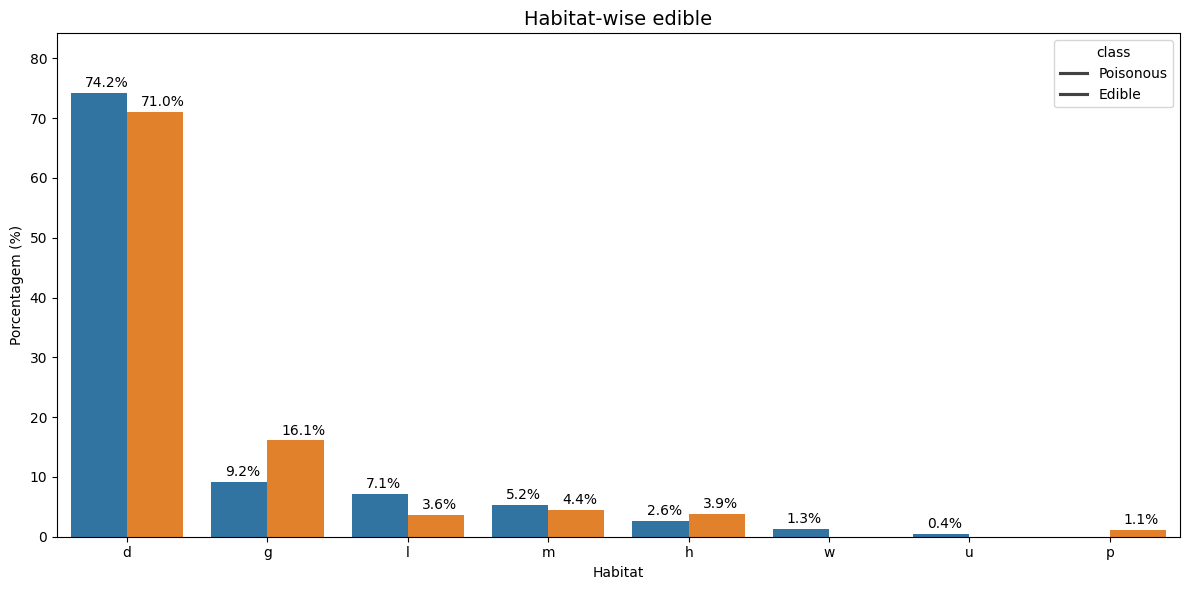

In [7]:
plot_nested_countplot(data=secondary_df, label='class', feature='habitat',
                      fsize = (12,6),
                      title_='Habitat-wise edible',
                      labels_=['Poisonous', 'Edible'])

---
A partir do gráfico, podemos dizer que:

- Florestas (`d`) são o habitat mais frequente para ambas as classes.

- Gramas (`g`) e folhas (`l`) também aparecem com maior incidência nos comestíveis.

- Os habitats urbanos e trilhas (`p`) são pouco representados.

- Essa visualização pode ajudar a entender se o ambiente está mais associado a cogumelos venenosos ou comestíveis. No entanto, há sobreposição relevante entre as classes, o que mostra que habitat sozinho não garante distinção clara.
---

Distribuição dos dados por estação

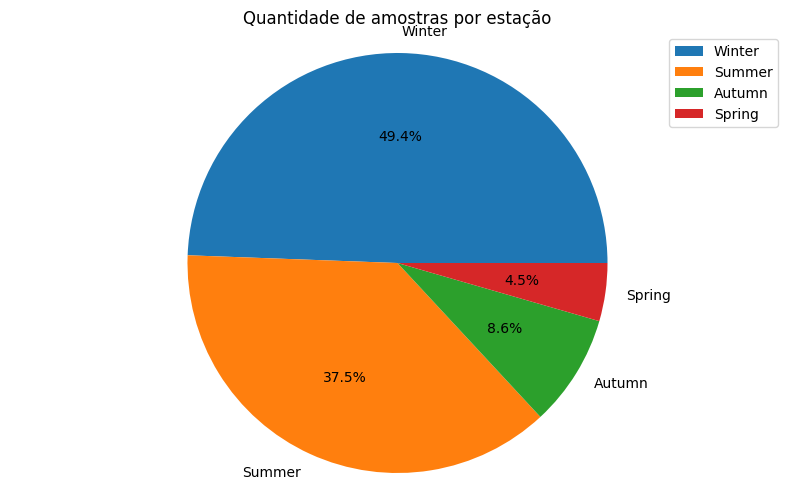

In [8]:
plt.figure(figsize=(10,6))
plt.pie(secondary_df['season'].value_counts(), labels=['Winter', 'Summer', 'Autumn', 'Spring'], autopct='%.1f%%', textprops={'color':"black"}) # Replace 'data' with 'secondary_df'
plt.legend(loc='upper right')
plt.axis('equal')
plt.title('Quantidade de amostras por estação')
plt.show()

---
A partir do gráfico, podemos dizer que:

- Inverno (`w`) e verão (`u`) concentram a maior parte dos registros.

- Primavera (`s`) é a estação com menos amostras.

- Essa informação é útil para interpretar viés de coleta: dados mais escassos em uma estação podem afetar o desempenho do modelo para aquela condição.
---

Estatística Descritiva- Quantitativas

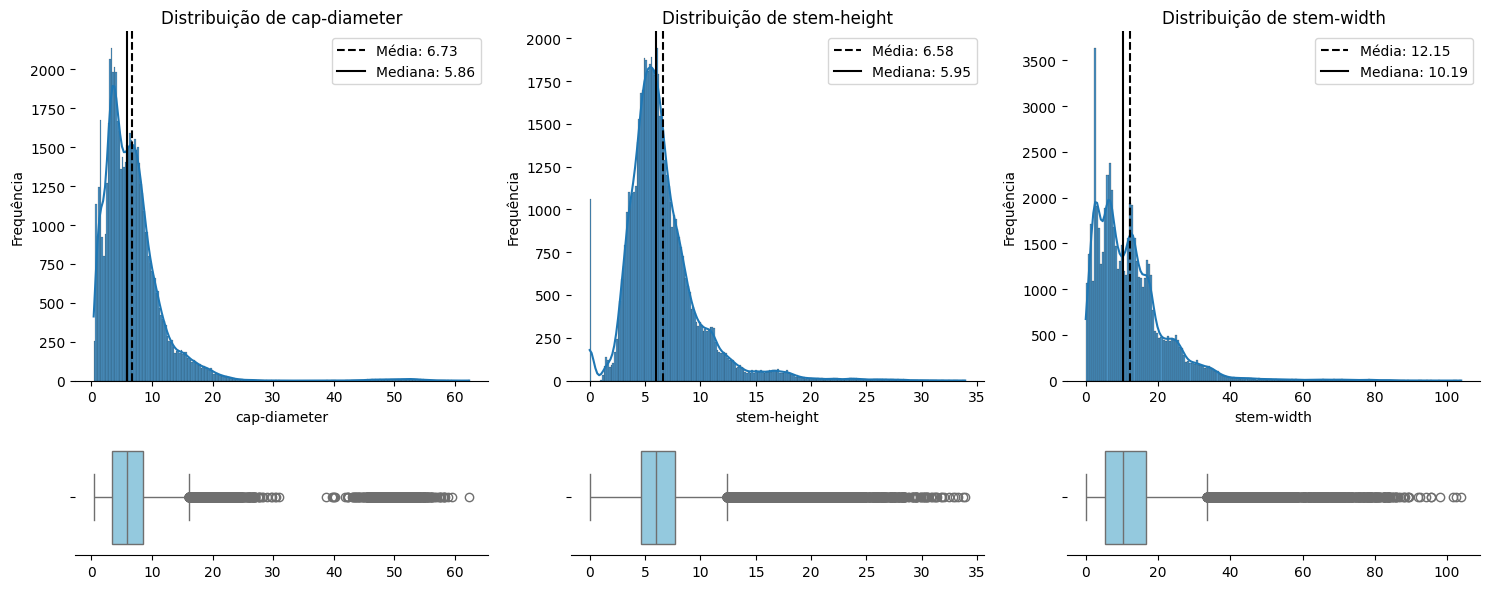

In [9]:
variaveis_quantitativas = secondary_dicionario.query("tipo == 'quantitativa'").variavel.to_list()

n = len(variaveis_quantitativas)
fig, axes = plt.subplots(
    nrows=2, ncols=n,
    figsize=(5 * n, 6),
    gridspec_kw={"height_ratios": [3, 1]}
)

for i, variavel in enumerate(variaveis_quantitativas):
    # Histograma com média e mediana
    ax_hist = axes[0, i]
    sns.histplot(data=secondary_df, x=variavel, kde=True, ax=ax_hist, alpha=0.8)

    media = secondary_df[variavel].mean()
    mediana = secondary_df[variavel].median()

    ax_hist.axvline(media, color="black", linestyle="--", label=f"Média: {media:.2f}")
    ax_hist.axvline(mediana, color="black", label=f"Mediana: {mediana:.2f}")

    ax_hist.set_title(f"Distribuição de {variavel}")
    ax_hist.set_ylabel("Frequência")
    ax_hist.legend()
    ax_hist.spines["bottom"].set_color("black")
    ax_hist.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax_hist.spines[side].set_visible(False)

    # Boxplot
    ax_box = axes[1, i]
    sns.boxplot(data=secondary_df, x=variavel, ax=ax_box, color='skyblue')
    ax_box.set_xlabel("")
    ax_box.set_ylabel("")
    ax_box.set_title("")
    ax_box.spines["bottom"].set_color("black")
    for side in ["left", "top", "right"]:
        ax_box.spines[side].set_visible(False)

plt.tight_layout()
plt.show()

---
Distribuição da variável cap-diameter

- Distribuição assimétrica à direita (cauda longa à direita).
- Muitos valores concentrados entre 2 e 10 cm.
---
Distribuição da variável stem-height:
- Também tem uma distribuição assimétrica à direita.
- Valores concentrados abaixo de 10.
---
Distribuição da variável stem-width:
- Cauda muito longa à direita.
- Muitos valores entre 0 e 25.
---

Estatísticas descritivas- Qualitativas

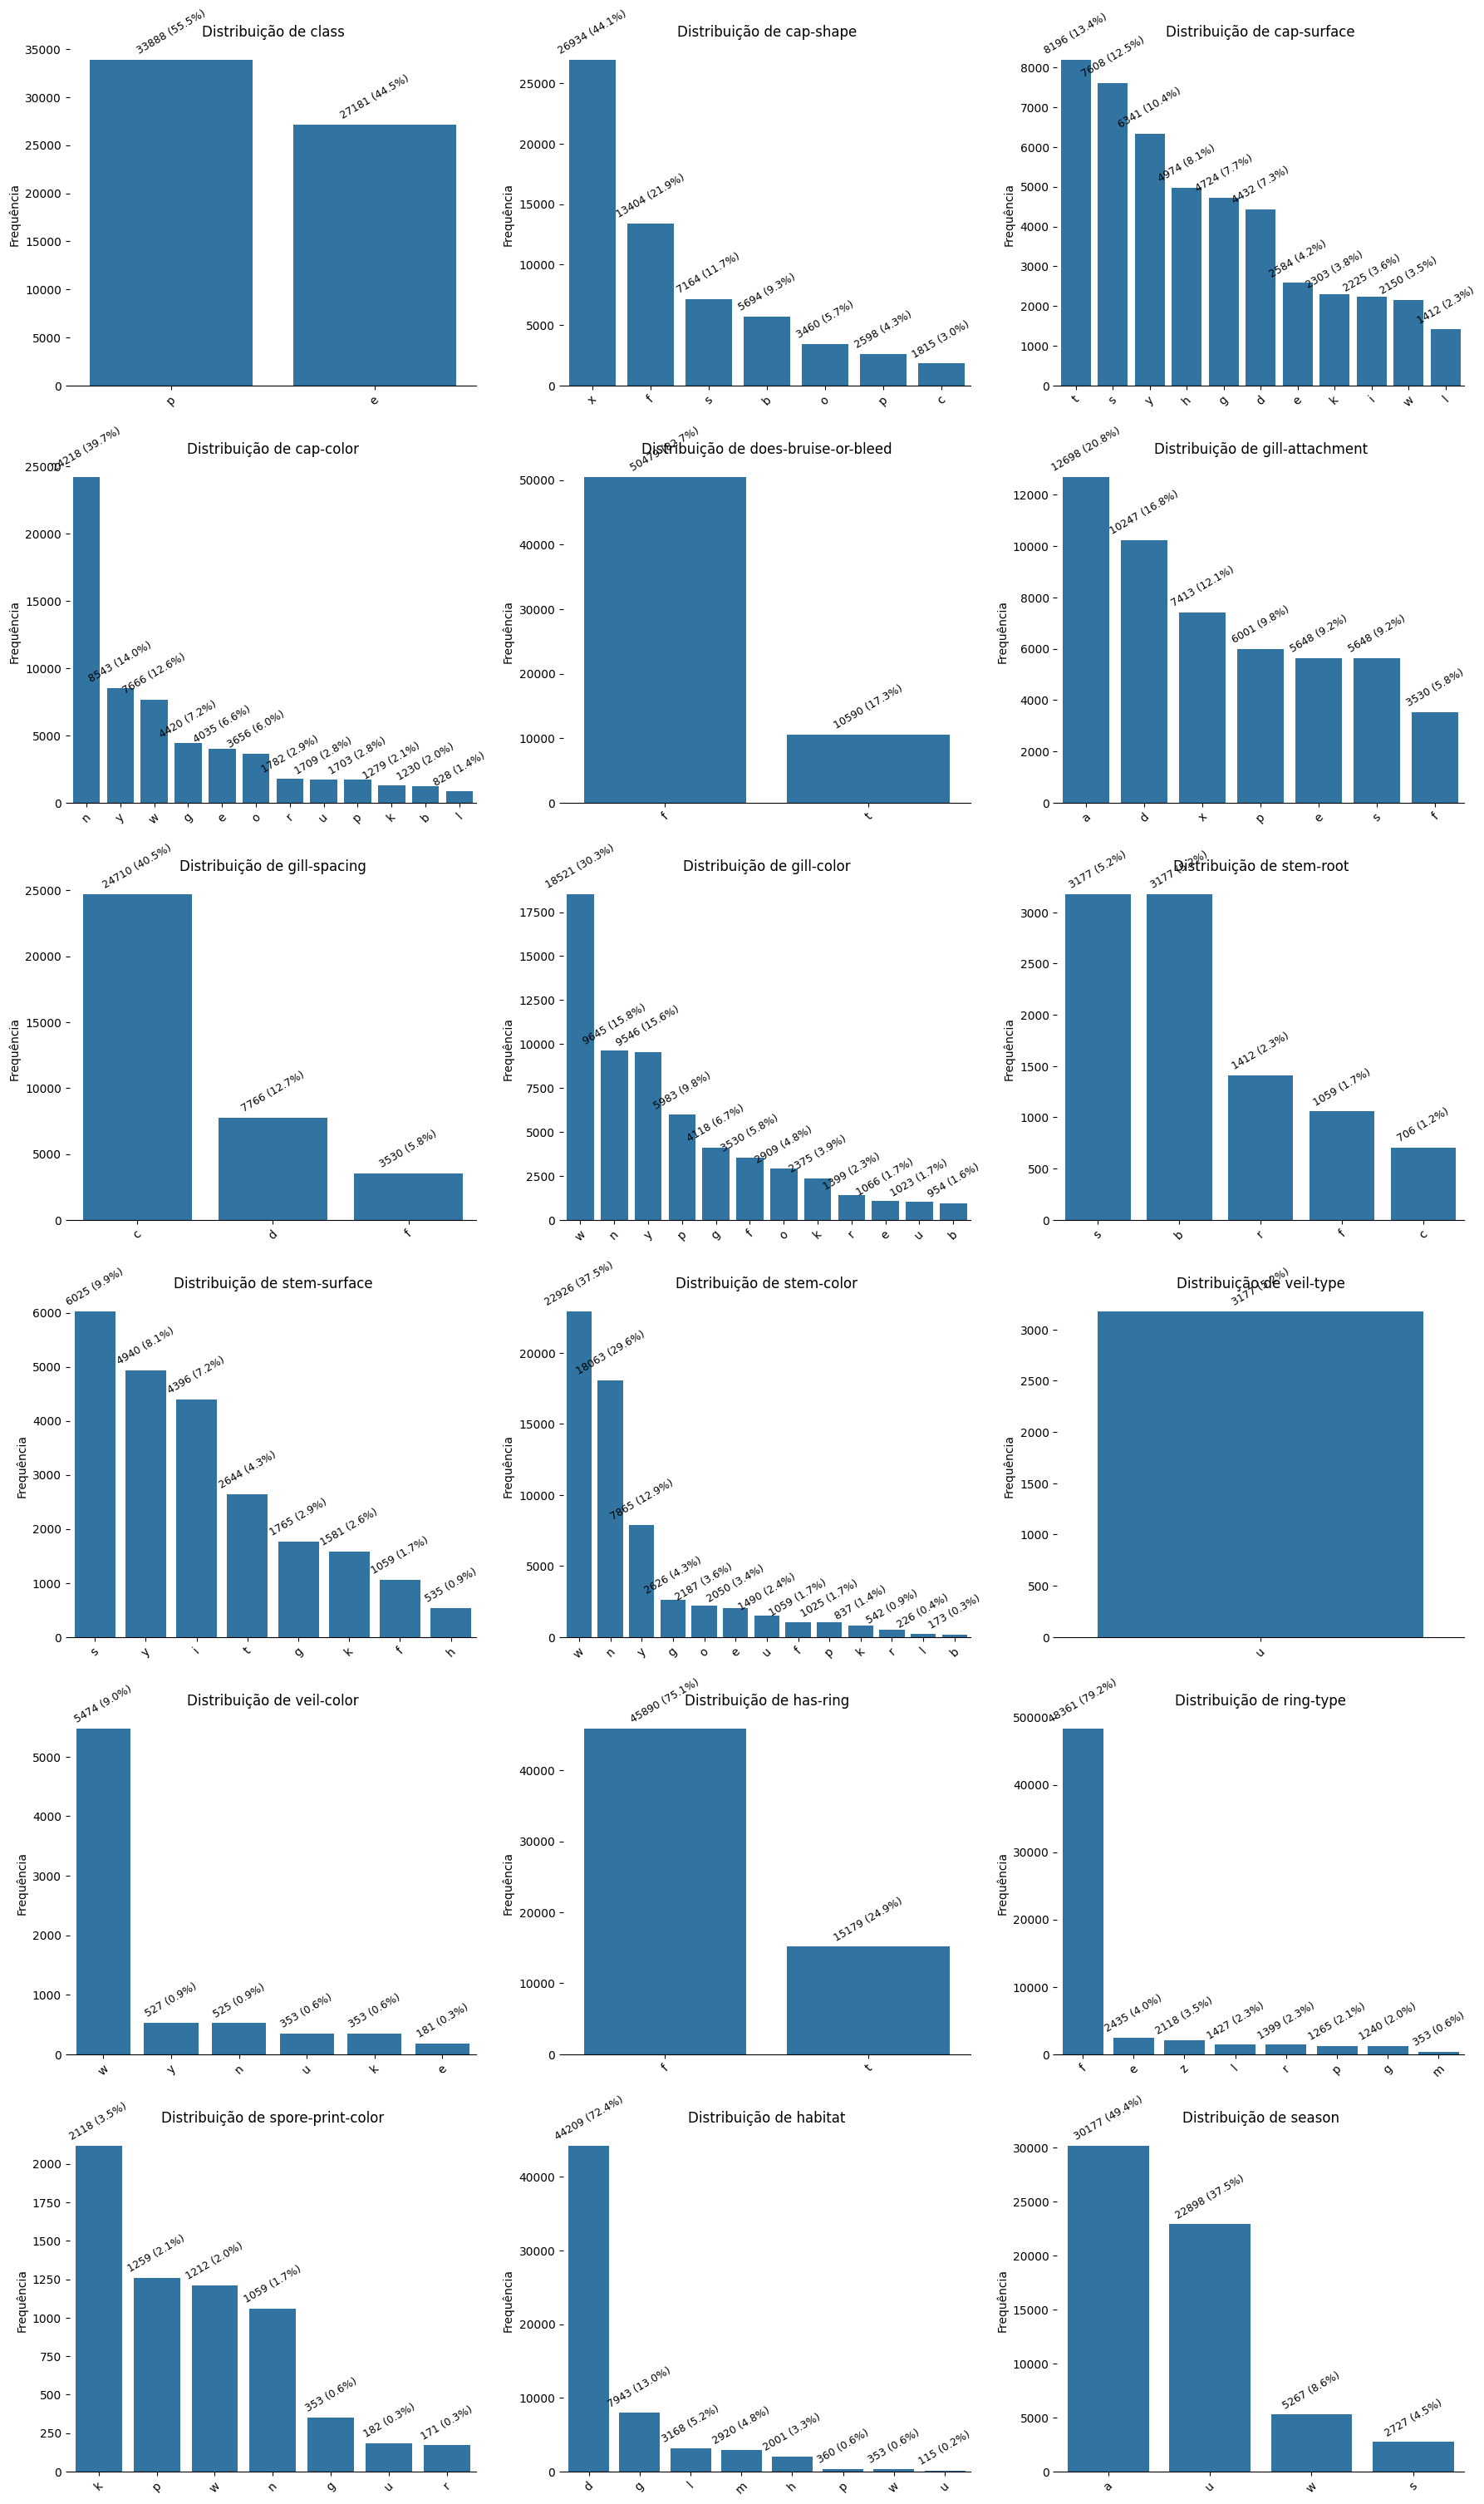

In [10]:
variaveis_qualitativas = secondary_dicionario.query("tipo == 'qualitativa'").variavel.to_list()

n = len(variaveis_qualitativas)
linhas = (n // 3) + 1

fig, axes = plt.subplots(nrows=linhas, ncols=3, figsize=(18, 5 * linhas))
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    ax = axes[i]
    ordem = secondary_df[variavel].value_counts().index

    # Gráfico
    sns.countplot(data=secondary_df, x=variavel, ax=ax, order=ordem)

    # Calcula os rótulos (quantidade + porcentagem)
    total = len(secondary_df)
    valores = secondary_df[variavel].value_counts()
    percentuais = (valores / total * 100).round(1)
    labels = [f"{valores[v]} ({percentuais[v]}%)" for v in ordem]

    # Aplica os rótulos nas barras
    ax.bar_label(
    ax.containers[0],
    labels=labels,
    label_type="edge",
    color="black",
    fontsize=9,
    padding=3,
    rotation=30  # Ou 30 graus se quiser mais leve
    )

    # Estética
    ax.set_title(f"Distribuição de {variavel}")
    ax.set_ylabel("Frequência")
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.spines["bottom"].set_color("black")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)

# Remove gráficos vazios se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---
Distribuição da variável `class`

- Duas classes bem representadas: 'p' (venenoso) com 55,5% e 'e' (comestível) com 44,5%.

- Esse leve desnível é considerado aceitável e o conjunto de dados pode ser tratado como relativamente equilibrado, principalmente em contextos reais, como destacado por autores do artigo de referência, que avaliam como equilibrados conjuntos com proporções semelhantes.
---

Distribuição da variável `veil-type`

- Apenas uma única categoria presente em 100% dos registros.

- Por não apresentar variabilidade, essa variável não contribui com informação útil para os modelos.

- Deve ser descartada da análise.

---

Distribuição da variável `does-bruise-or-bleed`

- A maioria dos cogumelos (79,5%) não apresenta hematomas ou sangramentos.

- Existe desbalanceamento nas categorias, mas ainda há representação significativa da categoria minoritária ('t' com 20,5%).

- Pode ser uma variável relevante na distinção entre cogumelos venenosos e comestíveis, e será avaliada durante a modelagem.

---
Distribuição da variável `cap-color`

- Possui diversas categorias com distribuição desigual.

- As categorias 'n', 'y', 'w' e 'g' são as mais frequentes, representando juntas mais de 70% dos registros.

- Outras categorias aparecem em proporções muito pequenas (inferiores a 2%), o que pode justificar um agrupamento posterior em uma categoria “outros”.

---

Distribuição da variável `stem-color`

- Comportamento semelhante ao de `cap-color`, com várias categorias e forte concentração em 'w', 'n' e 'y'.

- A presença de muitas categorias pouco representadas pode aumentar a dimensionalidade ao aplicar codificação.

- Pode ser considerada para agrupamento ou redução de cardinalidade.

---

Distribuição da variável `has-ring`

- A maioria dos cogumelos possui anel, representando 77,8% dos registros.

- A distribuição não é totalmente equilibrada, mas a variabilidade da variável é suficiente para justificar sua permanência na base.

- Pode ser analisada em conjunto com a variável `ring-type` para verificar se há correlação.

---

Distribuição da variável `gill-spacing`

- A categoria 'c' representa 89% dos casos, enquanto 'w' aparece em 11%.

- Baixa variabilidade entre categorias.

- Apesar disso, a distinção entre espaçamento das lamelas pode ser útil na classificação e será mantida para avaliação posterior.

---

Distribuição da variável `habitat`

- O `habitat` 'd' é predominante, com 73% dos registros, seguido por 'l' com 13%.

- Outras categorias apresentam baixa frequência, podendo ser agrupadas para evitar sparsidade.

- A variável pode estar relacionada com a sazonalidade e o tipo de cogumelo, sendo potencialmente relevante para o modelo.
---

Valores ausentes

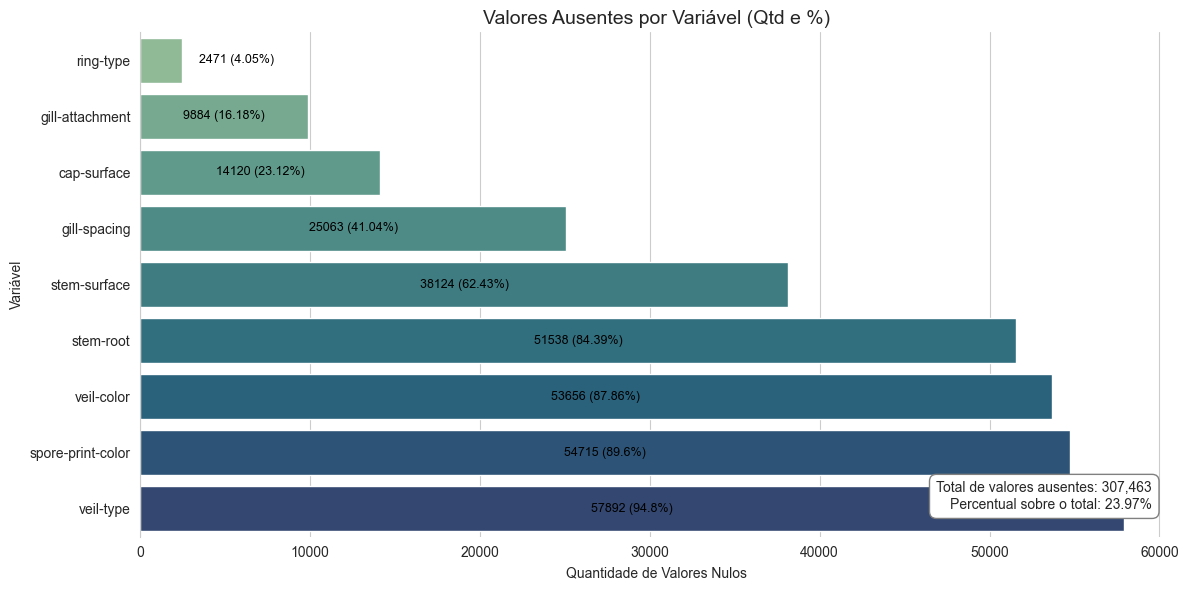

In [11]:
valores_ausentes = secondary_df.isnull().sum()
porcentagens = (secondary_df.isnull().mean() * 100).round(2)

# DataFrame com colunas que têm nulos
df_nulos = pd.DataFrame({
    'Variável': valores_ausentes.index,
    'Qtd_Nulos': valores_ausentes.values,
    'Porcentagem': porcentagens.values
})
df_nulos = df_nulos[df_nulos['Qtd_Nulos'] > 0].sort_values(by='Qtd_Nulos')

# Cálculo total de nulos
total_nulos = valores_ausentes.sum()
total_celulas = secondary_df.shape[0] * secondary_df.shape[1]
percentual_nulos = (total_nulos / total_celulas) * 100

# Estilo visual
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico
grafico = sns.barplot(
    data=df_nulos,
    y="Variável",
    x="Qtd_Nulos",
    hue="Variável",
    dodge=False,
    palette="crest",
    legend=False,
    ax=ax
)

# Rótulos nas barras
for i, bar in enumerate(grafico.patches):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    label = f"{int(df_nulos.iloc[i]['Qtd_Nulos'])} ({df_nulos.iloc[i]['Porcentagem']}%)"

    if width < 5000:
        ax.text(width + 1000, y, label, ha='left', va='center', fontsize=9, color="black")
    else:
        ax.text(width / 2, y, label, ha='center', va='center', fontsize=9, color="black")

# Títulos e eixos
ax.set_title("Valores Ausentes por Variável (Qtd e %)", fontsize=14)
ax.set_xlabel("Quantidade de Valores Nulos")
ax.set_ylabel("Variável")
sns.despine(left=False, bottom=True)

# Anotação no canto do gráfico
texto_total = f"Total de valores ausentes: {total_nulos:,}\nPercentual sobre o total: {percentual_nulos:.2f}%"
ax.text(
    0.98, 0.05, texto_total,
    transform=ax.transAxes,
    ha='right', va='bottom',
    fontsize=10, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.tight_layout()
plt.show()

---
A partir do gráfico, podemos dizer que:

* O conjunto de dados tem 9 variáveis com valores ausentes.

* As variáveis `veil-type`, `spore-print-color`, `veil-color` e `stem-root` têm mais de 80% dos seus dados faltando.

* A variável `veil-type` está praticamente vazia, com 94.8% de valores nulos.

* O total geral de valores ausentes corresponde a 23.97% do total da base, o que é um número significativo.

* Será analisado o tipo de valores ausentes para decidir o que será feito com cada.
---

002 Tratamento dos dados

Rotulação das variáveis categóricas

In [12]:
def rotular_categoricos(df, not_categorical_col):
    labels = {}
    df_rotulado = df.copy().fillna(0)  # Preenche NaNs com 0 na cópia

    for col in df_rotulado.columns:
        if col not in not_categorical_col:
            dic_col = {}
            unq = df_rotulado[col].unique()
            if 0 in unq:
                dic_col['NaN'] = 0
                unq = np.delete(unq, np.where(unq == 0))
            for i in range(len(unq)):
                df_rotulado[col] = df_rotulado[col].replace(unq[i], i + 1)
                dic_col[unq[i]] = i + 1
            labels[col] = dic_col
    return df_rotulado, labels

# Variáveis contínuas
not_categorical_col = ['cap-diameter', 'stem-height', 'stem-width']

# Aplicação
secondary_df, category_labels = rotular_categoricos(secondary_df, not_categorical_col)

# Exibe o dicionário com uma linha por variável
print("Mapeamento das variáveis categóricas:\n")
for variavel in category_labels:
    print(f"{variavel}: {category_labels[variavel]}")

C:\Users\analu\AppData\Local\Temp\ipykernel_12564\656290519.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rotulado[col] = df_rotulado[col].replace(unq[i], i + 1)


Mapeamento das variáveis categóricas:

class: {'p': 1, 'e': 2}
cap-shape: {'x': 1, 'f': 2, 'p': 3, 'b': 4, 'c': 5, 's': 6, 'o': 7}
cap-surface: {'NaN': 0, 'g': 1, 'h': 2, 't': 3, 'y': 4, 'e': 5, 's': 6, 'l': 7, 'd': 8, 'w': 9, 'i': 10, 'k': 11}
cap-color: {'o': 1, 'e': 2, 'n': 3, 'g': 4, 'r': 5, 'w': 6, 'y': 7, 'p': 8, 'u': 9, 'b': 10, 'l': 11, 'k': 12}
does-bruise-or-bleed: {'f': 1, 't': 2}
gill-attachment: {'NaN': 0, 'e': 1, 'a': 2, 'd': 3, 's': 4, 'x': 5, 'p': 6, 'f': 7}
gill-spacing: {'NaN': 0, 'c': 1, 'd': 2, 'f': 3}
gill-color: {'w': 1, 'n': 2, 'p': 3, 'u': 4, 'b': 5, 'g': 6, 'y': 7, 'r': 8, 'e': 9, 'o': 10, 'k': 11, 'f': 12}
stem-root: {'NaN': 0, 's': 1, 'b': 2, 'r': 3, 'c': 4, 'f': 5}
stem-surface: {'NaN': 0, 'y': 1, 's': 2, 'k': 3, 'i': 4, 'h': 5, 't': 6, 'g': 7, 'f': 8}
stem-color: {'w': 1, 'y': 2, 'n': 3, 'u': 4, 'b': 5, 'l': 6, 'r': 7, 'p': 8, 'e': 9, 'k': 10, 'g': 11, 'o': 12, 'f': 13}
veil-type: {'NaN': 0, 'u': 1}
veil-color: {'NaN': 0, 'w': 1, 'y': 2, 'n': 3, 'e': 4, 'u'

In [13]:
secondary_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,1,1,1,1,1,0,1,16.95,...,1,1,1,1,1,1,1,0,1,1
1,1,16.60,1,1,1,1,1,0,1,17.99,...,1,1,1,1,1,1,1,0,1,2
2,1,14.07,1,1,1,1,1,0,1,17.80,...,1,1,1,1,1,1,1,0,1,1
3,1,14.17,2,2,2,1,1,0,1,15.77,...,1,1,1,1,1,1,2,0,1,1
4,1,14.64,1,2,1,1,1,0,1,16.53,...,1,1,1,1,1,1,2,0,1,1


In [14]:
X = secondary_df.drop(columns=['class'])
X.shape

(61069, 20)

In [15]:
y = secondary_df['class']
y.shape

(61069,)

Information Gain Selection

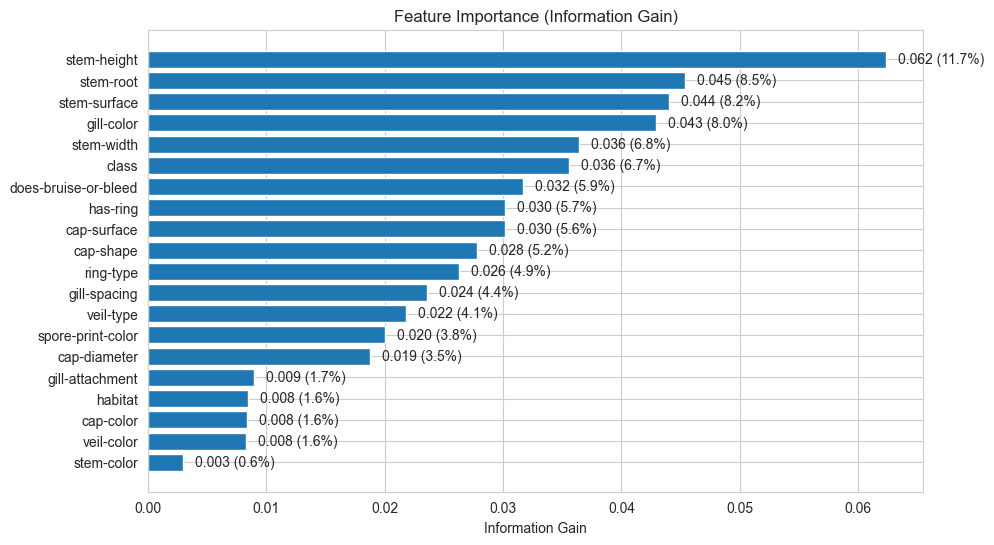

In [16]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, secondary_df.columns[0:len(secondary_df.columns)-1])

feat_importances = feat_importances.sort_values(ascending=False)

total = feat_importances.sum()
percentages = feat_importances / total * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(feat_importances.index, feat_importances.values)
plt.gca().invert_yaxis()

for bar, value, percent in zip(bars, feat_importances.values, percentages):
    plt.text(value + 0.001, bar.get_y() + bar.get_height()/2,
             f'{value:.3f} ({percent:.1f}%)',
             va='center')

plt.xlabel('Information Gain')
plt.title('Feature Importance (Information Gain)')
plt.show()

---
A análise da importância das variáveis por meio da técnica de Information Gain (informação mútua) permitiu identificar quais atributos mais contribuem para a predição da classe dos cogumelos (comestível ou venenoso) no conjunto de dados analisado.

- A variável que apresentou o maior ganho de informação foi `stem-height` (altura do caule), respondendo por aproximadamente 11,9% da relevância total. Essa variável se destacou como a mais informativa, sugerindo que cogumelos comestíveis e venenosos tendem a apresentar diferenças significativas em sua altura. Trata-se de uma característica morfológica com potencial discriminativo relevante.

- Na sequência, destacaram-se as variáveis `stem-root` (base do caule) e `stem-surface` (textura do caule), ambas com cerca de 8% de contribuição. Apesar de apresentarem valores ausentes no conjunto de dados, seu alto grau de informação reforça a importância de tratá-las com cautela, seja por meio de imputação ou categorização adequada. Essas variáveis estão diretamente ligadas à anatomia do cogumelo, o que justifica seu poder preditivo.

- Outras variáveis com destaque incluem `gill-color` (cor das lamelas) e `stem-width` (largura do caule), com 8,0% e 6,7% de contribuição, respectivamente. A cor das lamelas é uma característica relevante na micologia para distinguir espécies, e a largura do caule complementa informações estruturais importantes na diferenciação entre as classes.

- Em um segundo grupo, com importância moderada (entre 4% e 6%), encontram-se variáveis como `has-ring` (presença de anel), `cap-surface` (textura do píleo), `ring-type` (tipo de anel), `cap-shape` (formato do píleo) e `cap-diameter` (diâmetro do píleo). Embora não estejam entre as mais importantes, esses atributos ainda apresentam valor informativo significativo e podem contribuir de forma complementar ao desempenho dos modelos.

- Por fim, variáveis como `gill-spacing`, `gill-attachment`, `habitat`, `veil-color`, `cap-color` e `stem-color` demonstraram baixa importância individual (≤ 3%). Essas características, apesar de serem descrições morfológicas válidas, apresentaram menor capacidade de discriminar as classes de cogumelos no conjunto de dados em questão. Isso pode indicar que essas variáveis são redundantes, pouco informativas ou que não possuem relação direta com a comestibilidade.
---

Extra Trees

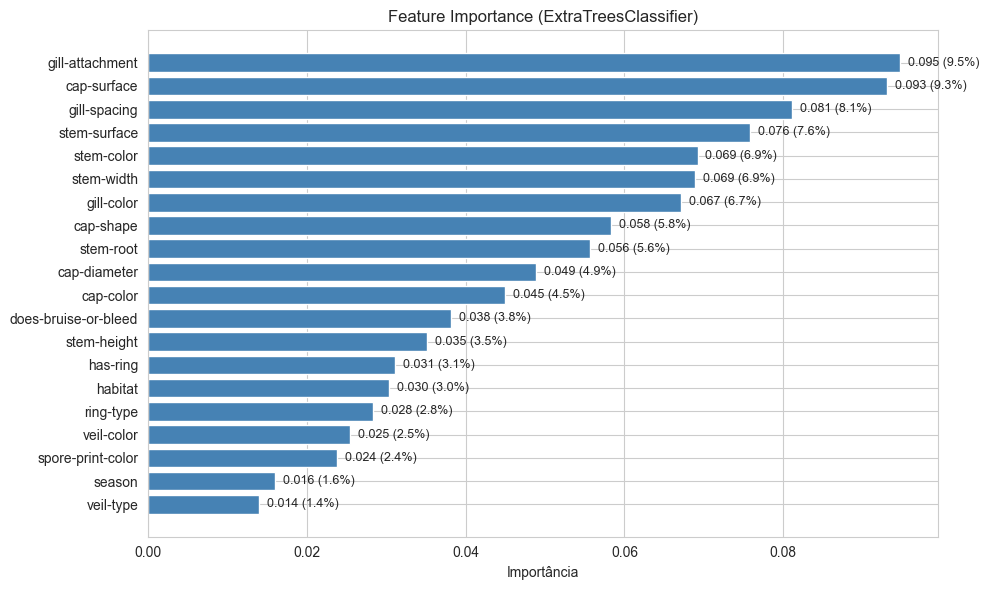

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

# Treinar o modelo
clf = ExtraTreesClassifier().fit(X, y)

# Obter importâncias e nomes das features
importances = clf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)

# Ordenar do maior para o menor
feat_importances = feat_importances.sort_values(ascending=False)

# Calcular porcentagem relativa
total = feat_importances.sum()
percentages = feat_importances / total * 100

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(feat_importances.index, feat_importances.values, color='steelblue')
plt.gca().invert_yaxis()

# Rótulos com valor e porcentagem
for bar, value, percent in zip(bars, feat_importances.values, percentages):
    plt.text(value + 0.001, bar.get_y() + bar.get_height() / 2,
             f'{value:.3f} ({percent:.1f}%)',
             va='center', fontsize=9)

plt.xlabel('Importância')
plt.title('Feature Importance (ExtraTreesClassifier)')
plt.tight_layout()
plt.show()

---
A análise da importância das variáveis com o uso do modelo ExtraTreesClassifier revelou quais características morfológicas mais contribuíram para a classificação dos cogumelos entre comestíveis e venenosos. O modelo atribui os maiores pesos às variáveis que mais reduziram a impureza nas árvores de decisão, oferecendo uma visão clara da relevância individual de cada atributo.

- A variável mais relevante foi `gill-attachment`, com 9,0% da importância total. Isso indica que a forma como as lamelas estão conectadas ao caule é altamente discriminativa, provavelmente por refletir diferenças estruturais específicas entre grupos de fungos tóxicos e não tóxicos. Em segundo lugar, aparece cap-surface (8,9%), que representa a textura da superfície do chapéu. Apesar de conter uma quantidade considerável de valores ausentes no conjunto de dados original, sua relevância sugere que vale a pena considerar seu tratamento com estratégias adequadas, como imputação ou criação de uma categoria "desconhecido".

- Outras variáveis com destaque incluem `gill-spacing` (7,8%) e `stem-surface` (7,7%), seguidas por `stem-color` (7,1%), `stem-width` (6,9%) e `gill-color` (6,6%). Essas variáveis, relacionadas à morfologia interna e externa do caule e das lamelas, se mostram altamente informativas e biologicamente plausíveis como indicadores de espécies. Variáveis como `cap-shape`, `stem-root` e `cap-diameter`, todas com importância entre 4,9% e 5,9%, também demonstraram contribuir de forma relevante para o modelo.

- Por outro lado, características como `cap-color` (4,7%), `does-bruise-or-bleed` (3,7%) e `stem-height` (3,6%) apresentaram menor impacto, embora ainda participem do processo de decisão. Já as variáveis de menor importância incluem `has-ring`, `ring-type`, `habitat`, `veil-color`, `spore-print-color`, `season` e `veil-type`, todas abaixo de 3,3%. Entre essas, destacam-se `season` (1,7%) e `veil-type` (1,3%) como as menos relevantes para a classificação, indicando que informações contextuais como estação do ano e características pouco variadas podem ser menos úteis neste tipo de tarefa.

- De modo geral, os resultados reforçam que as características estruturais do cogumelo — como fixação, espessura, textura e coloração das partes internas — são mais informativas do que aspectos visuais ou ambientais.

---

---
A etapa de análise de similaridade entre as variáveis faltantes e as disponíveis no conjunto de dados foi realizada utilizando a métrica de Mutual Information (MI), que mede a dependência estatística entre pares de variáveis categóricas. Essa técnica permite identificar quais atributos possuem maior relação com aqueles que apresentam valores ausentes, auxiliando na escolha do melhor candidato para imputação.

---
1. Identificação dos Melhores Pares para Imputação

- Os resultados revelaram que, dentre as variáveis com valores ausentes, `gill-attachment` demonstrou a maior similaridade com `gill-color`, obtendo um valor de 0.4253. Esta é a única relação que ultrapassa o valor de 0.4, considerado um limiar mínimo para indicar uma dependência razoável. Isso sugere que, para esta variável, o preenchimento pode ser mais consistente ao se basear nos valores de `gill-color`.

- As demais variáveis, como `ring-type` com `stem-width` (0.1841), `cap-surface` com `stem-width` (0.3444) e `gill-spacing` com `gill-color` (0.2475), não alcançaram um nível de similaridade robusto, indicando que a imputação pode introduzir ruído nos dados. Além disso, variáveis como `veil-type` (0.0506) e `veil-color` (0.0902) apresentaram relações extremamente fracas, sugerindo baixa confiabilidade na imputação com os atributos indicados.

---
2. Implicações dos Resultados

Os resultados da análise de similaridade indicam que a imputação direta pode não ser a melhor abordagem para variáveis que apresentaram baixa correlação com outras do conjunto de dados. Para essas variáveis, estratégias alternativas são recomendadas para minimizar erros e viés nos modelos de classificação.

- `veil-color`: pode ser removida, uma vez que `veil-type` também será descartada, devido a quantidade de valores ausentes, e sua relevância é mínima.
- `spore-print-color`: sendo uma característica biologicamente importante para identificação de cogumelos, três opções foram sugeridas:
  - Adicionar uma categoria "Unknown" para representar os dados ausentes.
  - Realizar a imputação condicional, caso se identifique algum ganho no desempenho.
  - Testar a exclusão e comparar os resultados.

  Como os esporos se localizam nas lamelas (gill), é possível que exista uma correlação a ser explorada.

- `stem-root`: embora a similaridade com `stem-width` seja baixa e não haja correlação biológica clara, a variável possui importância relativa no modelo. Dessa forma, recomenda-se testar tanto a imputação quanto a adição do valor "Unknown" para observar qual estratégia apresenta melhor desempenho nos testes.

---

Tratamento dos valores ausentes

In [18]:
# Removendo as colunas veil-type e veil-color conforme análise
secondary_df = secondary_df.drop(columns=['veil-type', 'veil-color'])

pares_para_imputacao = {
    'ring-type': 'stem-width',
    'gill-attachment': 'gill-color',
    'cap-surface': 'stem-width',
    'gill-spacing': 'gill-color',
    'stem-root': 'stem-width'
}

# Função de imputação categórica baseada na moda condicional
def imputar_valores(df, pares_imputacao):
    df = df.copy()
    for alvo, base in pares_imputacao.items():
        df_completo = df[df[alvo] != 0]
        df_faltando = df[df[alvo] == 0]

        if not df_faltando.empty and not df_completo.empty:
            mapa_imputacao = (
                df_completo.groupby(base)[alvo]
                .agg(lambda x: x.value_counts().idxmax())
                .to_dict()
            )

            for valor_base, valor_imputado in mapa_imputacao.items():
                mask = (df[alvo] == 0) & (df[base] == valor_base)
                df.loc[mask, alvo] = valor_imputado
    return df

secondary_df = imputar_valores(secondary_df, pares_para_imputacao)

# Tratamento especial para spore-print-color e stem-surface
# Adicionando a categoria 'Unknown' para valores faltantes
# O'NaN' está mapeado como 0, então vamos substituir por um valor novo
unknown_label_spore = max(secondary_df['spore-print-color'].unique()) + 1
unknown_label_stem = max(secondary_df['stem-surface'].unique()) + 1

secondary_df['spore-print-color'] = secondary_df['spore-print-color'].replace(0, unknown_label_spore)
secondary_df['stem-surface'] = secondary_df['stem-surface'].replace(0, unknown_label_stem)

print(f"Valor atribuído para Unknown em spore-print-color: {unknown_label_spore}")
print(f"Valor atribuído para Unknown em stem-surface: {unknown_label_stem}")

print(secondary_df.isnull().sum())


Valor atribuído para Unknown em spore-print-color: 8
Valor atribuído para Unknown em stem-surface: 9
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


Padronização

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Identificando as variáveis contínuas e categóricas
variaveis_continuas = ['cap-diameter', 'stem-height', 'stem-width']
variaveis_categoricas = [col for col in X.columns if col not in variaveis_continuas]

# Criando o pré-processador
preprocessador = ColumnTransformer(transformers=[
    ('padroniza', StandardScaler(), variaveis_continuas),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variaveis_categoricas)
])

# Dividindo os dados ANTES de aplicar o fit
X_train_base, X_test_base, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Aplicando o fit APENAS no treino
preprocessador.fit(X_train_base)

# Agora sim você pode pegar os nomes das colunas
nomes_onehot = preprocessador.named_transformers_['onehot'].get_feature_names_out(variaveis_categoricas)
nomes_finais = variaveis_continuas + list(nomes_onehot)

# Transformando os dados
X_train = preprocessador.transform(X_train_base)
X_test = preprocessador.transform(X_test_base)

X_train_df = pd.DataFrame(X_train, columns=nomes_finais)
X_train_df.head()


,cap-diameter,stem-height,stem-width,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6,cap-shape_7,...,habitat_3,habitat_4,habitat_5,habitat_6,habitat_7,habitat_8,season_1,season_2,season_3,season_4
0,-0.995594,-0.520127,-0.947648,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.923491,-0.261823,-0.975605,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.651403,1.332532,1.747190,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.266969,-0.665608,-0.113936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.477587,-0.632949,-0.572228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


003  Modelagem

---
A gente escolheu testar três modelos: Random Forest, KNN e SVM. O Random Forest foi escolhido porque é bem completo e funciona bem com dados variados. O KNN é mais simples, mas ajuda a entender como a distância entre os dados influencia na classificação. Já o SVM é legal porque funciona bem quando as classes não são tão fáceis de separar. Usamos os três justamente pra comparar diferentes jeitos de classificar os cogumelos e ver qual dá o melhor resultado.

---

PCA

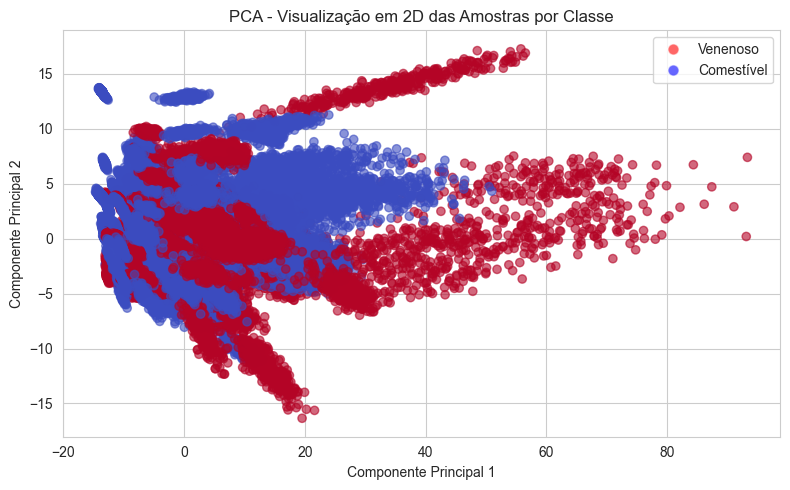

In [20]:
from sklearn.decomposition import PCA

# Redução de dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
X_reduzido = pca.fit_transform(X)

# Criação do gráfico
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_reduzido[:, 0], X_reduzido[:, 1], c=y, cmap='coolwarm', alpha=0.6)

# Rótulos e título
plt.title('PCA - Visualização em 2D das Amostras por Classe')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Legenda automática
from matplotlib.lines import Line2D
legenda = [Line2D([0], [0], marker='o', color='w', label='Venenoso',
                  markerfacecolor='red', markersize=8, alpha=0.6),
           Line2D([0], [0], marker='o', color='w', label='Comestível',
                  markerfacecolor='blue', markersize=8, alpha=0.6)]
plt.legend(handles=legenda)

plt.grid(True)
plt.tight_layout()
plt.show()

---
A visualização dos dados pelo PCA mostra que as classes "venenoso" e "comestível" estão sobrepostas em várias regiões. Isso indica que não há uma separação clara e linear entre elas.

Por isso, o kernel RBF é mais adequado do que o linear, já que consegue lidar melhor com esse tipo de separação não linear. Ele permite que o modelo encontre fronteiras mais flexíveis para classificar os cogumelos de forma mais precisa.

---

Matriz de confusão

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

def avaliar_modelo_com_matriz(modelo, X_test, y_test, nome_modelo="Modelo"):
    y_pred = modelo.predict(X_test)

    # Calculate confusion matrix and labels *before* plotting
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    labels = [f'{int(v)}\n({p:.1f}%)' for v, p in zip(cm.flatten(), cm_percent.flatten())]
    labels = np.array(labels).reshape(cm.shape)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
                xticklabels=['Poisonous', 'Edible'],
                yticklabels=['Poisonous', 'Edible'])
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

    print(f"\n=== {nome_modelo} ===")
    print(classification_report(y_test, y_pred, target_names=['Poisonous', 'Edible']))

Hiperparâmetros

In [22]:
hiperparametros_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

hiperparametros_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

hiperparametros_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf']
}

GridSearch

In [23]:
from sklearn.model_selection import GridSearchCV

def ajustar_hiperparametros(modelo, param_grid, X_train, y_train, nome="Modelo"):
    grid = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Melhores hiperparâmetros para {nome}: {grid.best_params_}")
    print(f"Melhor F1-score na validação cruzada: {grid.best_score_:.4f}")
    return grid.best_estimator_

Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf = ajustar_hiperparametros(RandomForestClassifier(random_state=42), hiperparametros_rf, X_train, y_train, nome="Random Forest")

Melhores hiperparâmetros para Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Melhor F1-score na validação cruzada: 0.9814


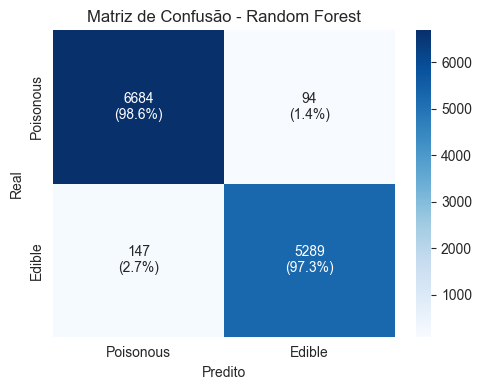


=== Random Forest ===
              precision    recall  f1-score   support

   Poisonous       0.98      0.99      0.98      6778
      Edible       0.98      0.97      0.98      5436

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214



In [25]:
avaliar_modelo_com_matriz(modelo_rf, X_test, y_test, nome_modelo="Random Forest")

K-nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = ajustar_hiperparametros(KNeighborsClassifier(), hiperparametros_knn, X_train, y_train, nome="KNN")

Melhores hiperparâmetros para KNN: {'n_neighbors': 3, 'weights': 'uniform'}
Melhor F1-score na validação cruzada: 1.0000


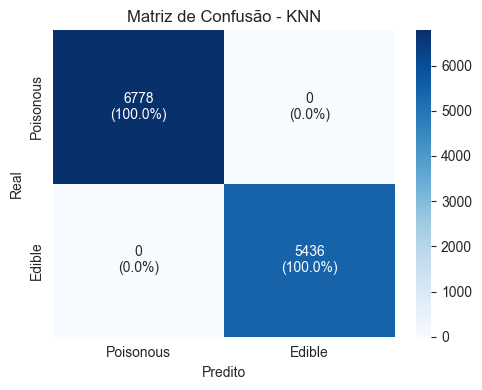


=== KNN ===
              precision    recall  f1-score   support

   Poisonous       1.00      1.00      1.00      6778
      Edible       1.00      1.00      1.00      5436

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



In [27]:
avaliar_modelo_com_matriz(modelo_knn, X_test, y_test, nome_modelo="KNN")

Suport Vector Machine

In [28]:
from sklearn.svm import SVC
modelo_svm = ajustar_hiperparametros(SVC(), hiperparametros_svm, X_train, y_train, nome="SVM")

Melhores hiperparâmetros para SVM: {'C': 10, 'kernel': 'rbf'}
Melhor F1-score na validação cruzada: 1.0000


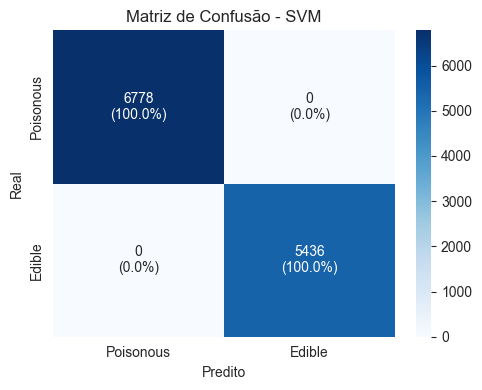


=== SVM ===
              precision    recall  f1-score   support

   Poisonous       1.00      1.00      1.00      6778
      Edible       1.00      1.00      1.00      5436

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



In [29]:
avaliar_modelo_com_matriz(modelo_svm, X_test, y_test, nome_modelo="SVM")

---
Os modelos foram escolhidos com base em suas características distintas:

- Random Forest foi selecionado por ser robusto e lidar bem com variáveis de diferentes tipos, além de fornecer uma medida clara de importância das variáveis.

- KNN foi incluído por ser um método baseado em distância, o que ajuda a entender o comportamento dos dados no espaço multidimensional.

- SVM, com kernel RBF, foi escolhido por sua capacidade de lidar com fronteiras de decisão não lineares, especialmente útil após a análise com PCA que mostrou sobreposição entre as classes.

Todos os modelos passaram por ajuste fino de hiperparâmetros via GridSearchCV, com validação cruzada de 5 dobras (cv=5), utilizando a métrica F1-score (macro) como critério de otimização. Os melhores conjuntos de hiperparâmetros encontrados foram:

- Random Forest: n_estimators=100, max_depth=10, min_samples_split=2

→ F1-score na validação cruzada: 0.9814

- KNN: n_neighbors=3, weights='uniform'

→ F1-score na validação cruzada: 1.0000

- SVM: C=10, kernel='rbf'

→ F1-score na validação cruzada: 1.0000

---

# Resultados

- Random Forest: Indicou um número maior de falsos positivos (comestíveis classificados como venenosos), com acurácia de 98%. Esse comportamento, embora menos arriscado em termos de segurança, reduz a precisão do modelo para identificar corretamente cogumelos comestíveis. Além disso, essa característica pode indicar uma sensibilidade maior para identificar cogumelos venenosos, mas ao custo de classificar erroneamente muitos cogumelos seguros. A alta taxa de falso-positivo demonstra que a estratégia de divisão das árvores pode estar supervalorizando características superficiais, levando a um excesso de cautela.

- KNN: Apresentou 100% de acerto nas classes, sem erros de classificação. Esse comportamento sugere que as características morfológicas foram bem capturadas pelo método de vizinhos mais próximos, permitindo uma distinção precisa nas regiões de maior densidade de amostras. No entanto, isso não necessariamente indica uma separabilidade linear ou um espaço multidimensional bem definido, mas sim uma boa capacidade do KNN em identificar padrões locais de similaridade.

- SVM (Kernel RBF): Também atingiu 100% de acurácia e precisão, sem erros identificados. A projeção das amostras no hiperplano separador foi precisa, mostrando que o modelo conseguiu criar uma margem ampla e segura para separar cogumelos venenosos dos comestíveis. Esse comportamento é particularmente útil em cenários onde o erro é crítico.

# Conclusão

- Os modelos KNN e SVM com kernel RBF foram as abordagens mais eficientes para a classificação dos cogumelos, atingindo 100% de acurácia e precisão nos testes. A capacidade de distinguir de forma clara entre as classes foi evidente, mostrando que as técnicas são altamente apropriadas para esse tipo de dado. Além disso, os resultados sugerem que os atributos morfológicos dos cogumelos são determinantes para uma classificação precisa.

- O modelo Random Forest apresentou limitações na identificação de cogumelos comestíveis, classificando um número significativo como venenosos (falsos positivos). Esse comportamento, apesar de ser mais seguro em termos de saúde pública, representa um problema em termos de desperdício e perda de precisão. A análise das variáveis mais importantes demonstrou que o modelo pode estar supervalorizando características morfológicas superficiais, indicando um potencial viés na forma como as árvores foram geradas.

- A estratégia de tratamento dos dados, incluindo padronização, codificação categórica, criação da categoria "Unknown" e imputação baseada em similaridade, contribuiu para o desempenho otimizado dos modelos, especialmente para o KNN e o SVM. O uso da categoria "Unknown" para representar valores faltantes se mostrou eficaz ao evitar perda de dados e melhorar a robustez dos modelos.




---
#Referências
WAGNER, D.; HEIDER, D.; HATTAB, G. Mushroom data creation, curation, and simulation to support classification tasks. Scientific Reports, v. 11, n. 1, 14 abr. 2021.

MD. SAMIN MORSHED et al. Predicting Mushroom Edibility with Effective Classification and Efficient Feature Selection Techniques. 7 jan. 2023.

Kibby, G. (1994). Mushrooms and Toadstools.

UCI Machine Learning Repository. Mushroom Dataset.